1382*x**10/58046625 + 2*x**8/10395 + x**6/675 + 2*x**4/189 + x**2/15 + 1/3 + x**(-2)


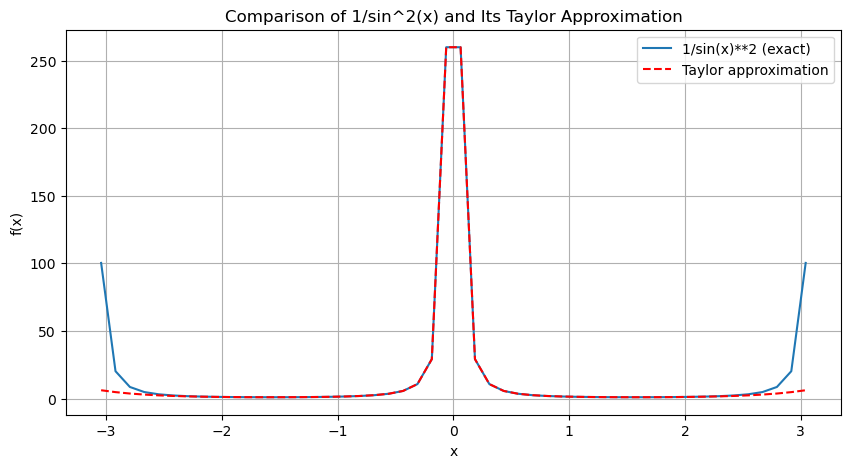

In [65]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Определяем символьную переменную
x = sp.symbols('x')

# Определяем функцию
f = 1 / sp.sin(x) ** 2

# Вычисляем ряд Тейлора для функции 1/sin^2(x) в точке 0, порядок 8
taylor_series = f.series(x, 0, 12).removeO()  # removeO убирает символ O большое

print(taylor_series)

# Чтобы конвертировать ряд в функцию, используем lambda
taylor_func = sp.lambdify(x, taylor_series)

# Теперь можно использовать taylor_func как обычную функцию для numpy массивов
x_values = np.linspace(-np.pi + 0.1, np.pi - 0.1, 50)  # Избегаем точек, где sin(x) = 0
y_values = 1 / np.sin(x_values) ** 2

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='1/sin(x)**2 (exact)')
plt.plot(x_values, taylor_func(x_values), 'r--', label='Taylor approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparison of 1/sin^2(x) and Its Taylor Approximation')
plt.grid(True)
plt.show()


        4         2
0.1069 x + 0.254 x + 1
          2
-0.07937 x - 0 x + 1


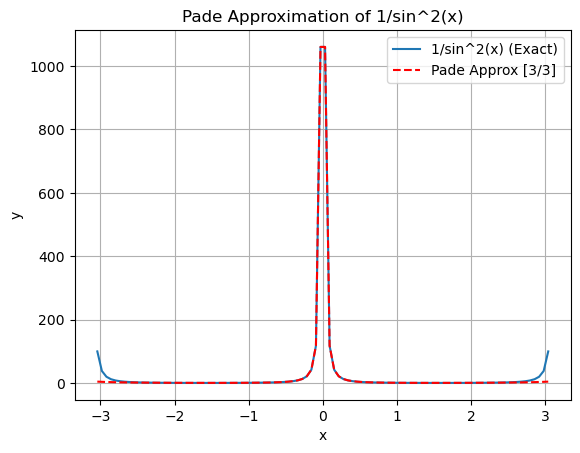

In [84]:
import numpy as np
from scipy.interpolate import pade, lagrange
import matplotlib.pyplot as plt

# Коэффициенты ряда для x^2/sin^2(x), начинающегося с 1
coefficients = [1, 0, 1 / 3, 0, 2 / 15, 0, 2 / 189,0, 6 / 675]  # Примерный ряд

# Задаём порядки для числителя и знаменателя аппроксимации Паде
M, N = 2, 4  # Приближение Паде [3/3]
p, q = pade(coefficients, M,N)

# Функция для аппроксимации
pade_approx = lambda x: p(x) / q(x) / x ** 2  # обратное масштабирование
print(p)
print(q)
# Визуализация
x_values = np.linspace(-np.pi + 0.1, np.pi - 0.1, 100)  # избегаем нуля
plt.plot(x_values, 1 / np.sin(x_values) ** 2, label='1/sin^2(x) (Exact)')
plt.plot(x_values, pade_approx(x_values), 'r--', label='Pade Approx [3/3]')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pade Approximation of 1/sin^2(x)')
plt.grid(True)
plt.show()


In [52]:
import sympy
import math

x = sympy.Symbol('x')
f = 1 / sympy.sin(x) ** 2


def lagrange(data, x):
    result = 0
    for k in range(len(data)):
        p_r = fun(data[k])
        for j in range(len(data)):
            if j != k:
                p_r *= (x - data[j]) / (data[k] - data[j])
        result += p_r
    return result

    

def fun(x):
    return 1 / math.sin(x) ** 2

Polynomial: 50.2137683604087*(0.0999999999999999 - 0.3*x)*(0.25 - 0.25*x)*(0.357142857142857 - 0.214285714285714*x)*(0.4375 - 0.1875*x)*(0.5 - 0.166666666666667*x)*(-1.5*x - 3.5)*(-0.75*x - 1.25)*(-0.5*x - 0.5)*(-0.375*x - 0.125) + 1.91258275667886*(0.125 - 0.375*x)*(0.3 - 0.3*x)*(0.416666666666667 - 0.25*x)*(0.5 - 0.214285714285714*x)*(0.5625 - 0.1875*x)*(-1.5*x - 2.5)*(-0.75*x - 0.75)*(-0.5*x - 0.166666666666667)*(1.5*x + 4.5) + 1.00924773461495*(0.166666666666667 - 0.5*x)*(0.375 - 0.375*x)*(0.5 - 0.3*x)*(0.583333333333333 - 0.25*x)*(0.642857142857143 - 0.214285714285714*x)*(-1.5*x - 1.5)*(-0.75*x - 0.25)*(0.75*x + 2.25)*(1.5*x + 3.5) + 1.41228292743739*(0.25 - 0.75*x)*(0.5 - 0.5*x)*(0.625 - 0.375*x)*(0.7 - 0.3*x)*(0.75 - 0.25*x)*(-1.5*x - 0.5)*(0.5*x + 1.5)*(0.75*x + 1.75)*(1.5*x + 2.5) + 9.34087344479068*(0.5 - 1.5*x)*(0.75 - 0.75*x)*(0.833333333333333 - 0.5*x)*(0.875 - 0.375*x)*(0.9 - 0.3*x)*(0.375*x + 1.125)*(0.5*x + 1.16666666666667)*(0.75*x + 1.25)*(1.5*x + 1.5) + 9.34087344479

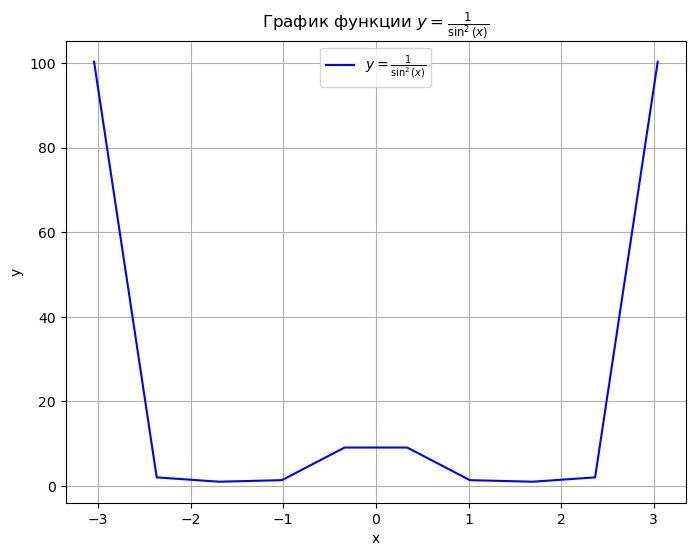

In [79]:
import numpy as np
import sympy as sp

def lagrange_polynomial(x_values, y_values):
    """
    Построение полинома Лагранжа по заданным точкам.

    Аргументы:
    x_values : numpy array
        Массив значений x.
    y_values : numpy array
        Массив значений y.

    Возвращает:
    polynomial : sympy expression
        Полином Лагранжа.
    """
    x = sp.symbols('x')
    polynomial = 0
    n = len(x_values)

    for i in range(n):
        term = 1
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        polynomial += y_values[i] * term

    return polynomial

# Пример использования
# Генерация точек с помощью np.linspace
def compute_y(x_values):
    """
    Вычисление значений y на основе значений x для функции y = 1/sin^2(x).

    Аргументы:
    x_values : numpy array
        Массив значений x.

    Возвращает:
    y_values : numpy array
        Массив значений y.
    """
    y_values = 1 / np.sin(x_values)**2
    return y_values

# Пример использования
# Генерация значений x с помощью np.linspace
x_values = np.linspace(-3, 3, 10)  # Пример значений от 0 до 2*pi
# Вычисление значений y
y_values = compute_y(x_values)
# Построение полинома Лагранжа
polynomial = lagrange_polynomial(x_values, y_values)
print("Polynomial:", polynomial)
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(-np.pi + 0.1, np.pi - 0.1, 10), compute_y(np.linspace(-np.pi + 0.1, np.pi - 0.1, 10)), label=r'$y = \frac{1}{\sin^2(x)}$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции $y = \\frac{1}{\\sin^2(x)}$')
plt.grid(True)
plt.legend()
plt.show()